In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 1. Import dataset and display first 5 rows

df = pd.read_csv("tvmarketing.csv")
print("First five rows : \n\n " , df.head())

First five rows : 

        TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [3]:
# 2. Check column data types
print("Check data types of csv : \n" , df.dtypes)

Check data types of csv : 
 TV       float64
Sales    float64
dtype: object


In [4]:
# 3. Check the shape of the Data Frame (rows, columns)
print("Check the shape of df : " , df.shape)

Check the shape of df :  (200, 2)


In [5]:
# 4. Look at summary statistics
print("Statistics of the data : \n", df.describe())

Statistics of the data : 
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


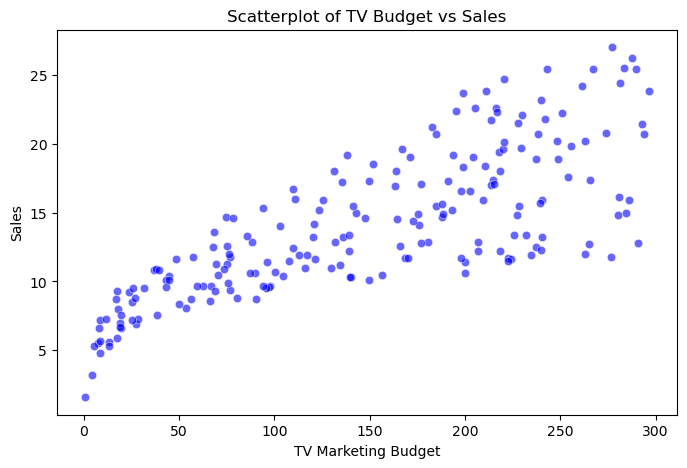

In [6]:
# 5. Visualize the relationship between the features and the dependent variable using scatterplots


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["TV"], y=df["Sales"], color='blue', alpha=0.6)
plt.title("Scatterplot of TV Budget vs Sales")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.show()


In [17]:
# 6. Prepare X (feature variables) and y (response variable)

X = df[['TV']]
y = df['Sales']


In [18]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)



In [19]:
print(X_train.shape)
print(X_test.shape)

(140, 1)
(60, 1)


In [20]:

# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

# Convert training data to numpy arrays
X_train_np = X_train.values.flatten()  # flatten to 1D array
y_train_np = y_train.values

# Calculate means
mean_x = np.mean(X_train_np)
mean_y = np.mean(y_train_np)

# Calculate slope (b1)
numerator = np.sum((X_train_np - mean_x) * (y_train_np - mean_y))
denominator = np.sum((X_train_np - mean_x)**2)
b1 = numerator / denominator

# Calculate intercept (b0)
b0 = mean_y - b1 * mean_x

print("\nManual Linear Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)




Manual Linear Regression Coefficients:
Intercept (b0): 7.2394598307511355
Slope (b1): 0.04640780212815278


In [21]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set
y_pred_manual = b0 + b1 * X_test
print(y_pred_manual[:5])  # Display first few predictions

            TV
95   14.817854
15   16.307544
30   20.832305
158   7.782431
128  17.463099


In [22]:
# 11.Perform Linear Regression using library(sklearn)

from sklearn.linear_model import LinearRegression

# Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [23]:
# 12.Print the intercept and coefficients

print("\nscikit-learn Linear Regression Coefficients:")
print("Intercept:", lr.intercept_)
print("Coefficient for TV:", lr.coef_[0])




scikit-learn Linear Regression Coefficients:
Intercept: 7.23945983075114
Coefficient for TV: 0.04640780212815275


In [24]:
# Predict sales for the test set
y_pred = lr.predict(X_test)

# Display first few predictions
print("Predicted Sales for Test Data:\n", y_pred[:5])


Predicted Sales for Test Data:
 [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


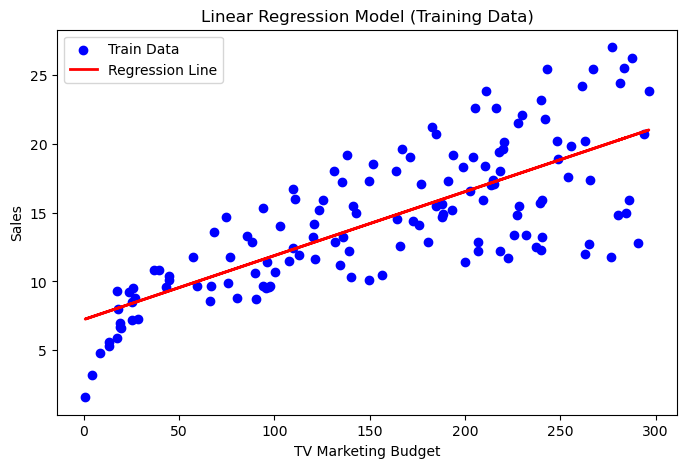

In [25]:
# 14.Plot train data and the model

# using pyplot

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.plot(X_train, lr.predict(X_train), color='red', linewidth=2, label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Training Data)")
plt.legend()
plt.show()



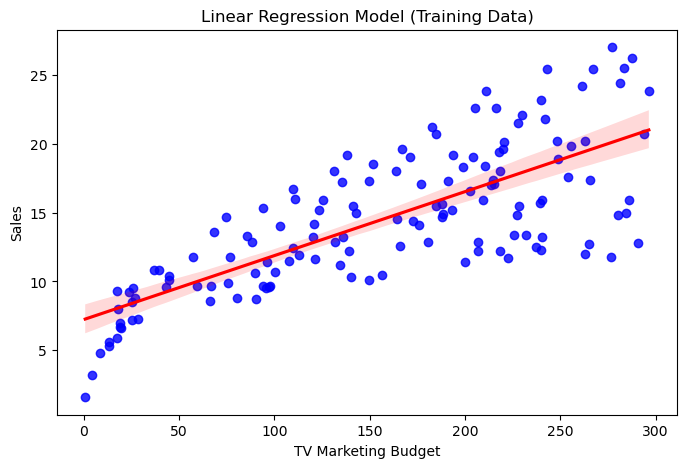

In [26]:
# 14.Plot train data and the model

# using seaborn

plt.figure(figsize=(8, 5))
sns.regplot(x=X_train, y=y_train, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Training Data)")
plt.show()




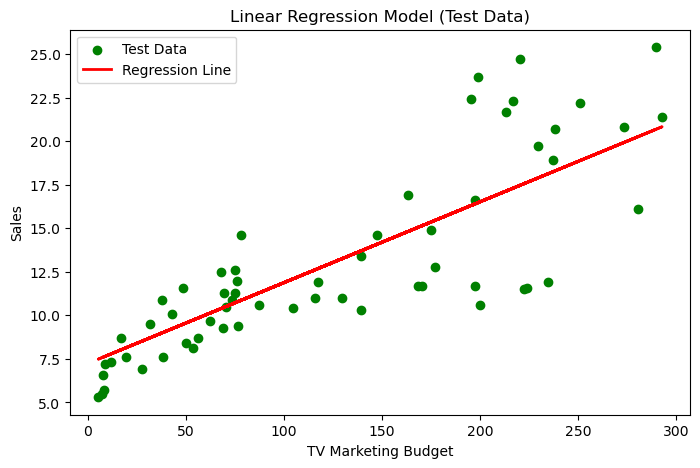

In [27]:
# 15.Plot test data and the model

# using pyplot

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_test, lr.predict(X_test), color='red', linewidth=2, label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Test Data)")
plt.legend()
plt.show()



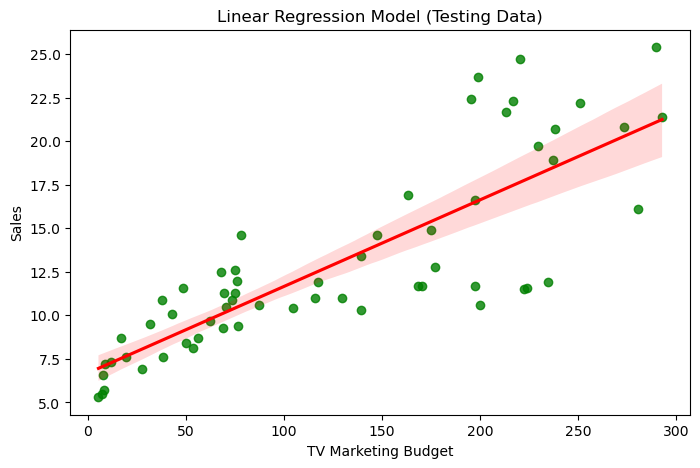

In [28]:
# 15.Plot test data and the model

# using seaborn

plt.figure(figsize=(8, 5))
sns.regplot(x=X_test, y=y_test, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Testing Data)")
plt.show()


In [33]:
# 16.Print Mean Squared Error and R Squared Valu


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Mean Squared Error (MSE): 8.970991242413616
R² Score: 0.6714477229302764


In [32]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

# Convert test data and predictions to numpy arrays (if not already)
y_test_np = y_test
n = len(y_test_np)
p = 1

# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
